<center>
<font size='7' style="color:#0D47A1">  <b>GENERATIVE ADVERSARIAL NETWORKS</b></font>
</center>

<br>

<font size='6' style="color:#00A6D6">  <b>Introduction. Generative Models</b></font>

Generative Models have become an a popular area of research recently.

There are a number of ways to formulate the problem but essentially we have a set of examples and we want to generate more images which look like the previous examples. 

So for instance, we might have the set of handwritten digits (MNIST) and we want to generate fake hand written random digits.

Or maybe we want to create fake news.

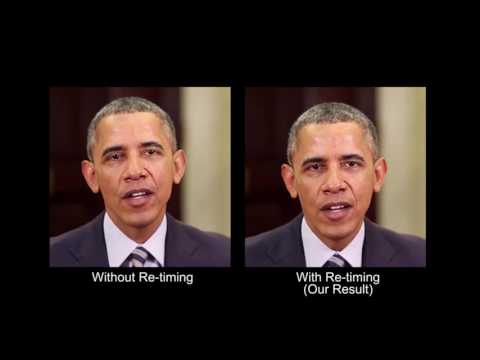

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("9Yq67CjDqvw")

Presently known applications:
1. Image denoising
2. Inpainting
3. Super-resolution
4. Structured Prediction
5. Exploration in Reinforcement Leanring
6. Neural Network Pretraining

The stretch sell:
Generative models are a way to push artificial intelligence further.
"What I canoot create, I do not understand" -- Richard Feynman

"If you cannot model your process, you don't understand it" --unknown

<br>
<br>
<br>
<font size='5' style="color:#4CAF50">  <b>Approaches</b></font>

There are a couple of approaches to the task of generative modeling including variational autoencodes, autregressive models and generative adversarial networks (GAN).  We discuss generative adversarial networks here.

Generative advesarial networks consist of two neural networks.  A discriminative network and a generative model.  A discriminative model learning a function that maps the input of data (x) into some desired output class label (y).  Probabilistically we could say that the discriminative model learns P(y|x).  A generative model tries to learn the joint probability of the input data and labels simultaneously.

IN the generative adversarial networks, we have a sample set and we will use one model which will take noise and create a second sample.  Then we have a discriminator which predics whether data is from the original sample or from the generate sample.

<br>    
<br>    
<br>    
<font size='6' style="color:#00A6D6">  <b>Strengths/Weaknesses</b></font>

<br>    
<br>    
<br>    
<font size='6' style="color:#00A6D6">  <b>Example</b></font>

We will do a very simple example of using a generative neural network to learn a Gaussian distribution.

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

/home/woates/anaconda3/envs/machineLearning/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


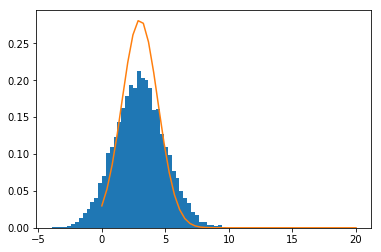

In [3]:
## Class/function for generating our sample data.

class dataDistribution():
    def __init__(self):
        self.mu = 3
        self.sigma = 2

    def sample(self, N):
        samples = np.random.normal(self.mu, self.sigma, N)
        samples.sort()
        return np.reshape(samples, (-1,1))

gauss = dataDistribution()
plt.hist(gauss.sample(10000),50,normed=1)
plt.hold
plt.plot(np.linspace(0,20), 1/np.sqrt(2*np.pi*gauss.sigma)*np.exp(-(np.linspace(0,20)-gauss.mu)**2/2/gauss.sigma))
plt.show()


/home/woates/anaconda3/envs/machineLearning/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


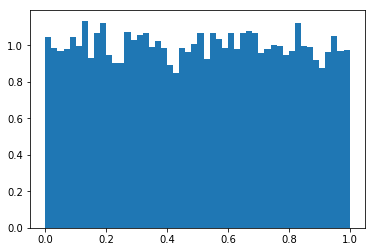

In [4]:
# Generators take random variables as inputs, typically from uniform normal.  So we will sample U(0,1)
def sample(N):
    return np.reshape(np.random.random(N), (-1,1))

plt.hist(sample(10000),50,normed=1)
plt.show()


In [5]:
#Define linear, which is the building block of our neural networks.  takes an input and returns x*w + b
def linear(input, output_dim, scope = None, stddev = 1.0):
    with tf.variable_scope(scope or 'linear', reuse=tf.AUTO_REUSE): 
        w = tf.get_variable(
            'w',
            [input.get_shape()[1], output_dim],
            initializer=tf.random_normal_initializer(stddev=stddev),
        )
        b = tf.get_variable(
            'b',
            [output_dim],
            initializer=tf.constant_initializer(0.0),
        )
        return tf.matmul(input,w) + b

In [6]:
#define our generator neural network.  
#It is standard practice to have the number of variables in the discriminator 
#to be significantly less than the number of data points.


def generator(input, h_dim):
    h0 = tf.nn.relu(linear(input, h_dim, 'g0', stddev = 1.0))
    h1 = linear(h0, 1, 'g1', stddev = 1.0)
    return h1

In [7]:
#define the discriminator network. Typically the architecture of the 
#discriminator is bigger than that of the generator.
def discriminator(input, h_dim):
    h0 = tf.nn.relu(linear(input, h_dim*2, 'd0'))
    h1 = tf.nn.relu(linear(h0, h_dim*2, 'd1'))   
    h2 = tf.nn.relu(linear(h1, h_dim, 'd2'))
    return tf.sigmoid(linear(h2,2,'d3'))
    

In [8]:
def log(x):
    return tf.log(tf.maximum(x,1e-5))

In [9]:
h_dim = 10
epochs = 10
rounds = 200
num_input_gen = 1
num_input_dis = 1

In [10]:
tf.reset_default_graph()
X_gen = tf.placeholder("float", [None, num_input_gen])
X_dis = tf.placeholder("float", [None, num_input_dis])
Y = tf.placeholder("float", [None, 2])
logits = discriminator(X_dis,h_dim)
gen = generator(X_gen,h_dim)
genPred = discriminator(gen, h_dim)
dis = discriminator(X_dis, h_dim)
genLoss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = genPred, labels = Y))
disLoss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = dis, labels = Y))

In [11]:
dis_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, "d")
gen_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, "g")
learning_rate = 0.0001
optimizer = tf.train.AdamOptimizer(learning_rate)
train_dis = optimizer.minimize(disLoss, var_list = dis_vars)
train_gen = optimizer.minimize(genLoss, var_list = gen_vars)

Round 0 ended
 Generator Histogram:


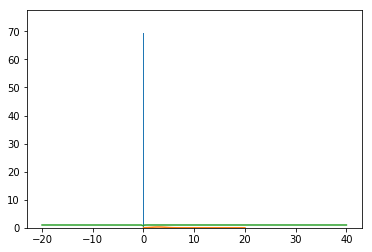

Round 10 ended
 Generator Histogram:


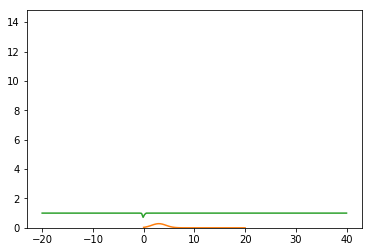

Round 20 ended
 Generator Histogram:


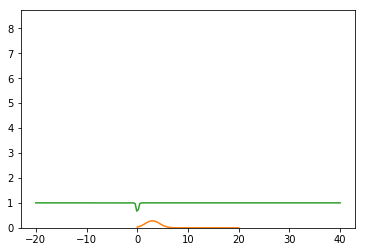

Round 30 ended
 Generator Histogram:


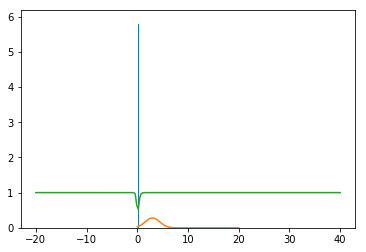

Round 40 ended
 Generator Histogram:


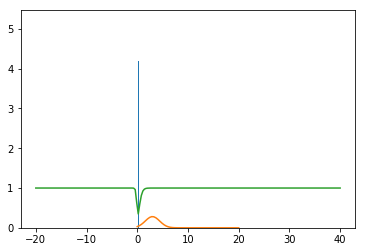

Round 50 ended
 Generator Histogram:


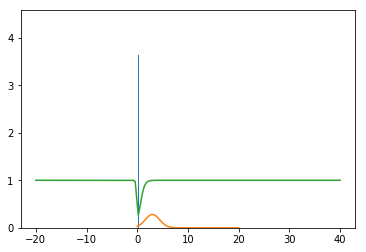

Round 60 ended
 Generator Histogram:


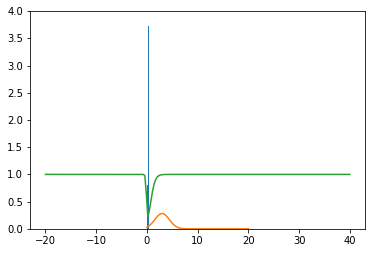

Round 70 ended
 Generator Histogram:


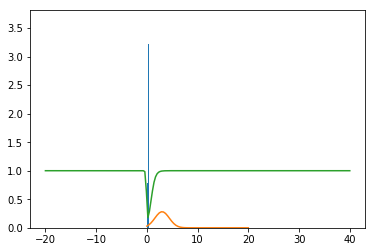

Round 80 ended
 Generator Histogram:


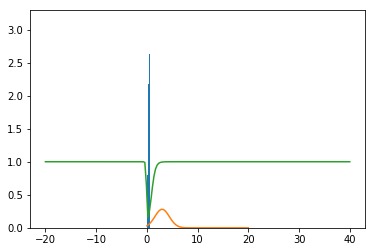

Round 90 ended
 Generator Histogram:


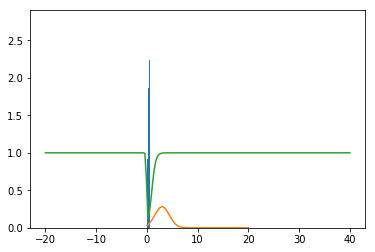

Round 100 ended
 Generator Histogram:


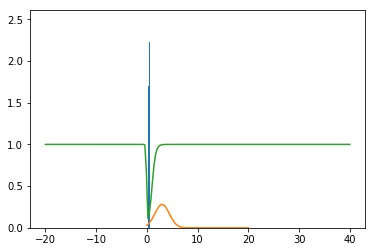

Round 110 ended
 Generator Histogram:


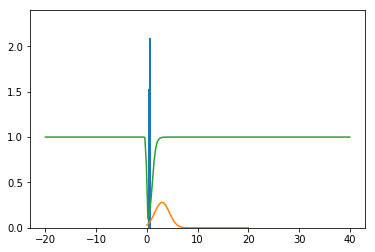

Round 120 ended
 Generator Histogram:


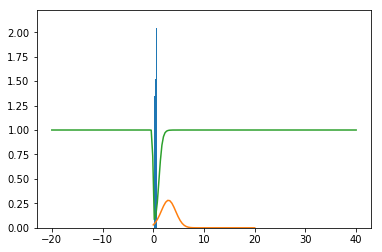

Round 130 ended
 Generator Histogram:


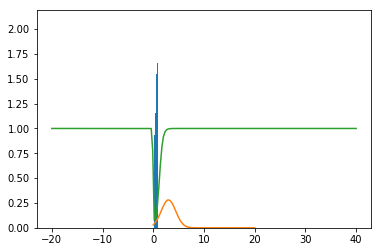

Round 140 ended
 Generator Histogram:


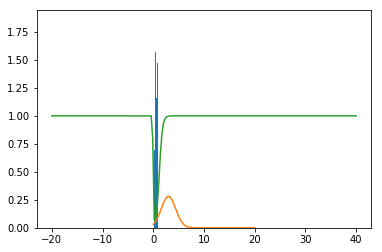

Round 150 ended
 Generator Histogram:


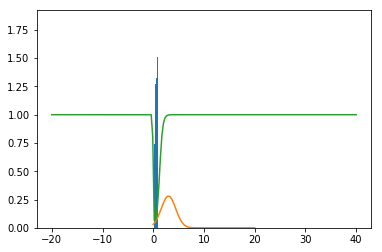

Round 160 ended
 Generator Histogram:


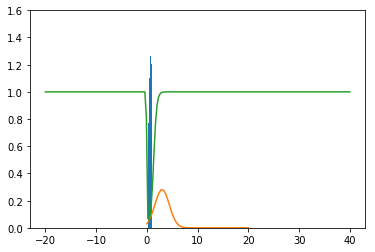

Round 170 ended
 Generator Histogram:


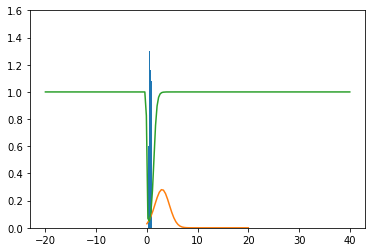

Round 180 ended
 Generator Histogram:


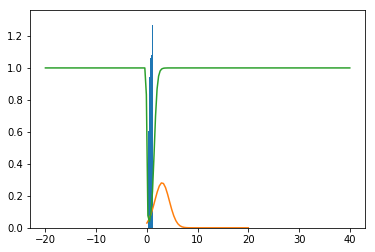

Round 190 ended
 Generator Histogram:


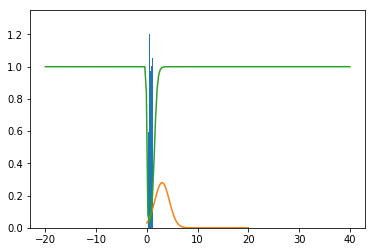

Round 200 ended
 Generator Histogram:


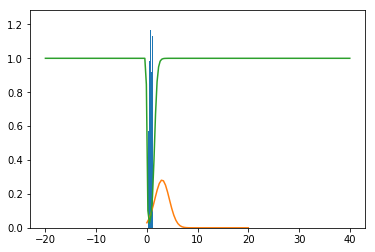

In [14]:
with tf.Session() as session:
    tf.local_variables_initializer().run()
    tf.global_variables_initializer().run()
    for round in range(rounds+1):
        for epoch in range(epochs):
            
            x_gen = session.run(gen,feed_dict ={X_gen:sample(100)})
            x_dis = gauss.sample(100)
            x = np.concatenate([x_gen, x_dis],axis = 0)
            y_gen = np.concatenate([np.ones(x_gen.shape),np.zeros(x_gen.shape)],axis= 1)
            y_dis = np.concatenate([np.zeros(x_dis.shape),np.ones(x_dis.shape)],axis=1)
            y = np.concatenate([y_gen, y_dis], axis = 0)
            #perm = np.random.permutation(x.size)
            #x = x[perm]
            #y = y[perm]
            session.run(train_dis, feed_dict = {X_dis:x, Y:y})
       # for epoch in range(epochs):
            x_gen = sample(100)
            y_desired = np.concatenate([np.zeros(x_gen.shape),np.ones(x_gen.shape)],axis= 1)
            session.run(train_gen, feed_dict = {X_gen:x_gen, Y:y_desired})
        if round % 10 == 0:
            print("Round {} ended\n Generator Histogram:".format(round))
            plt.hist(session.run(gen,feed_dict ={X_gen:sample(10000)}),50,density=True)
            plt.hold
            plt.plot(np.linspace(0,20), 1/np.sqrt(2*np.pi*gauss.sigma)*np.exp(-(np.linspace(0,20)-gauss.mu)**2/2/gauss.sigma))
            y = session.run(dis, feed_dict= {X_dis: np.reshape(np.linspace(-20,40,200),(-1,1))} )
            plt.plot(np.linspace(-20,40,200),y[:,1])
            #plt.legend(['Histogram of Generator Data', 'Probability Distribution of Data', 'Discriminator'])
            plt.show()

Here you can see an example of a GAN with Fashion Mnist: https://github.com/spaceLenny/FashionDCGANExample

<br>    
<br>    
<br>    
<font size='6' style="color:#00A6D6">  <b>Summary</b></font>

<br>    
<br>    
<br>    
<font size='6' style="color:#00A6D6">  <b>References</b></font>

Sources: http://blog.aylien.com/introduction-generative-adversarial-networks-code-tensorflow/
        https://blog.openai.com/generative-models/
        http://grail.cs.washington.edu/projects/AudioToObama/siggraph17_obama.pdf